In [106]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Бизнес-задачи: определить стоит ли давать кредит человеку исходя из его личных данных и кредитной истории
Задача машинного обучения: Бинарная классификация


In [107]:
data = fetch_openml('credit-g')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [108]:
X = data.data
y = data.target
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['bad', 'good']

подгружаем датасет с данными о кредитной истории клиентов банка, разделяем его на целевую переменную и фичи

In [109]:
X.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [111]:
for col in X.columns:
    print(X[col].value_counts())

checking_status
no checking    394
<0             274
0<=X<200       269
>=200           63
Name: count, dtype: int64
duration
24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: count, dtype: int64
credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64
purpose
radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance     

смотрим в каком формате находятся данные и их распределение

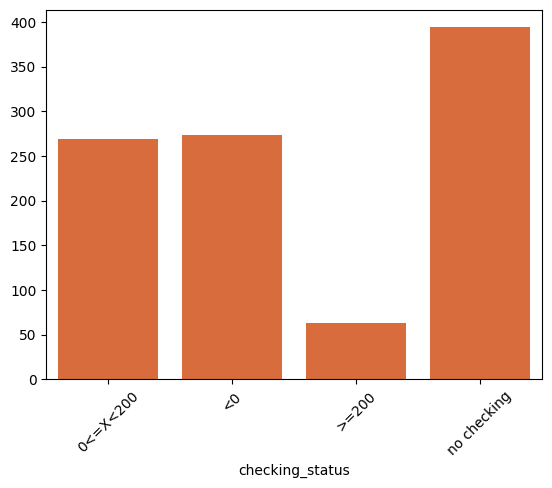

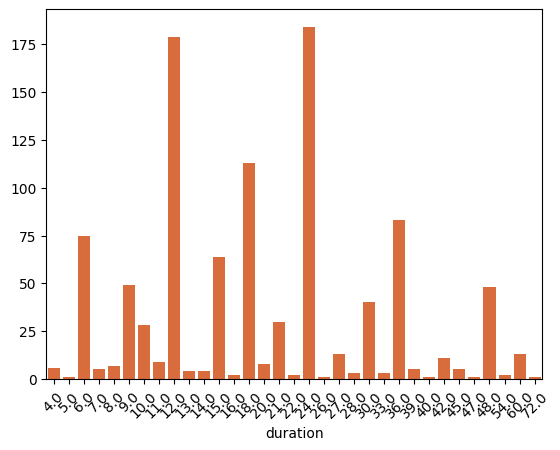

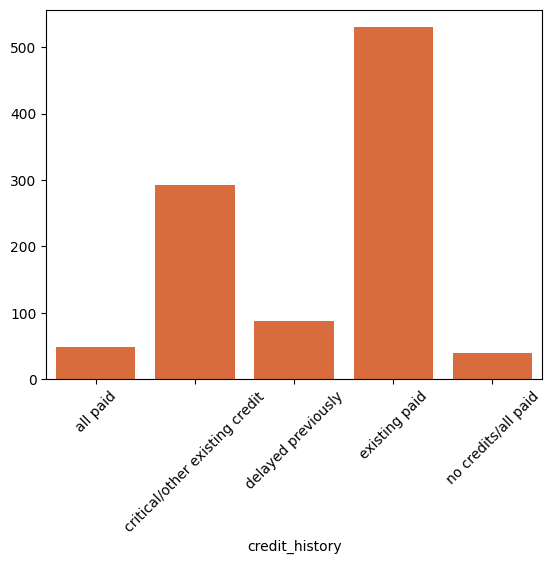

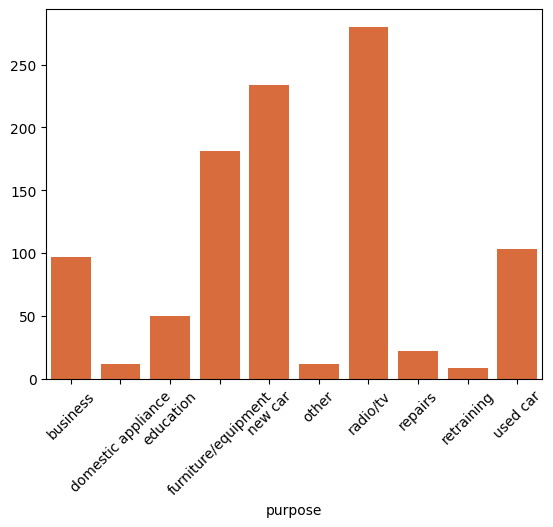

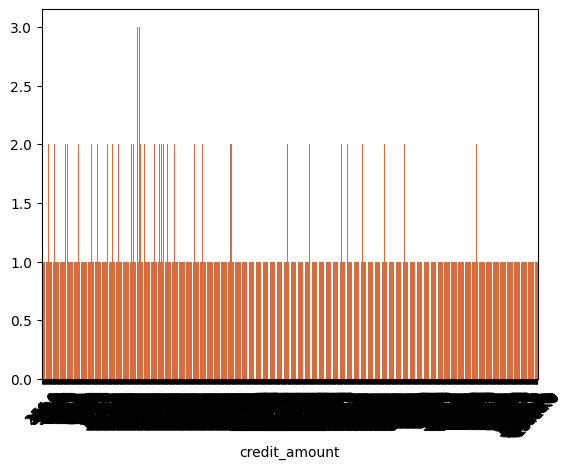

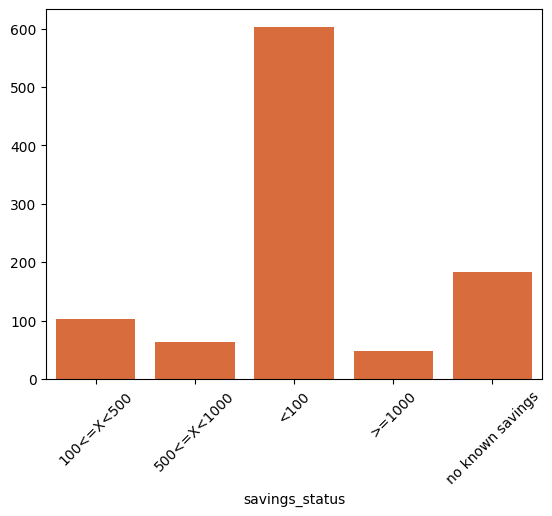

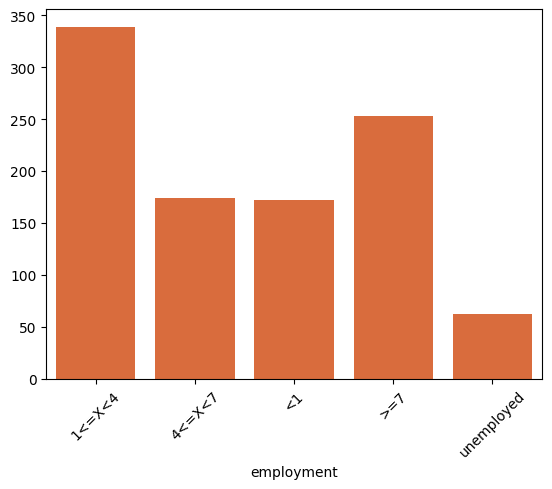

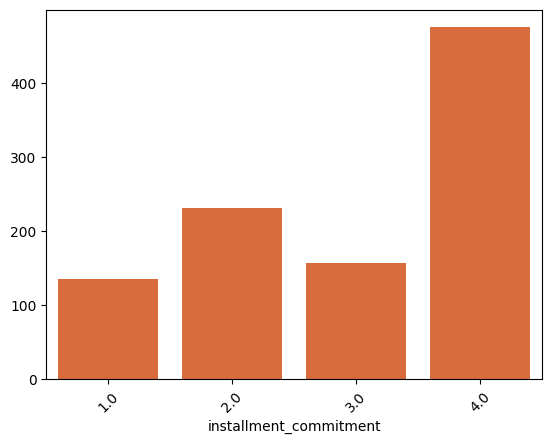

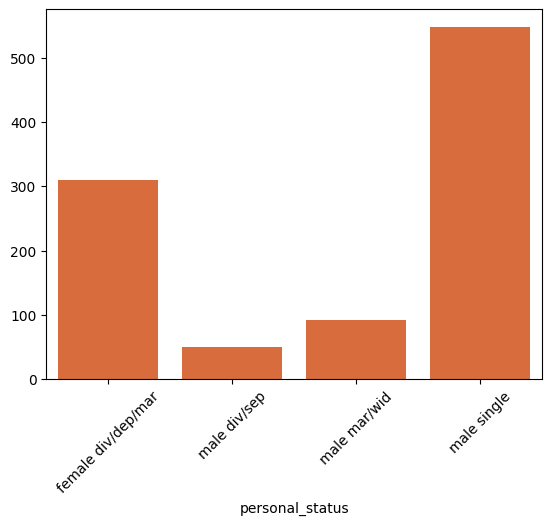

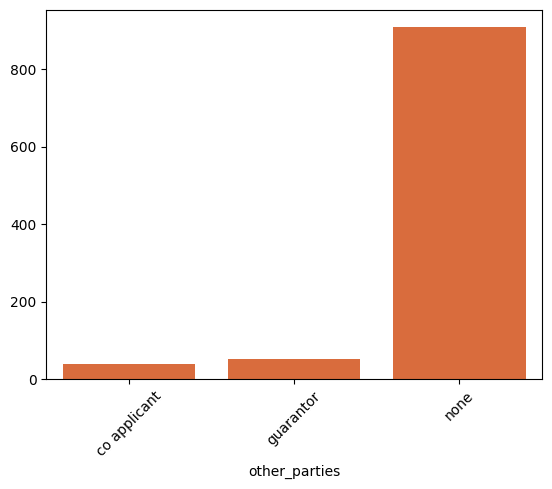

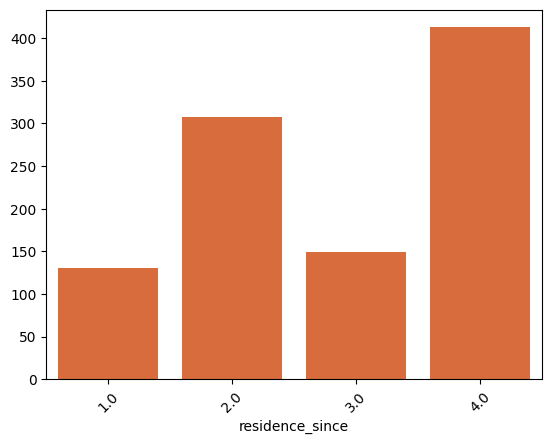

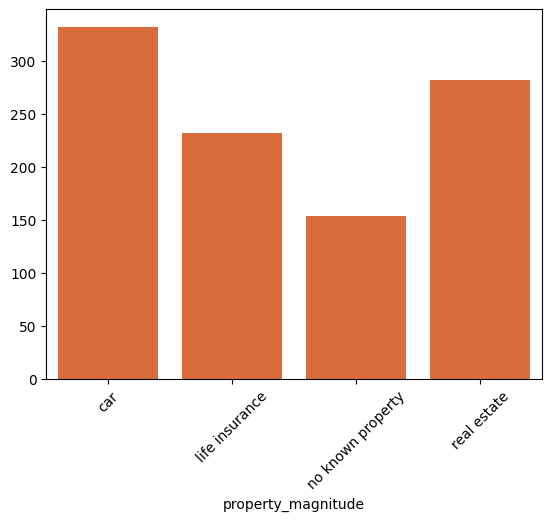

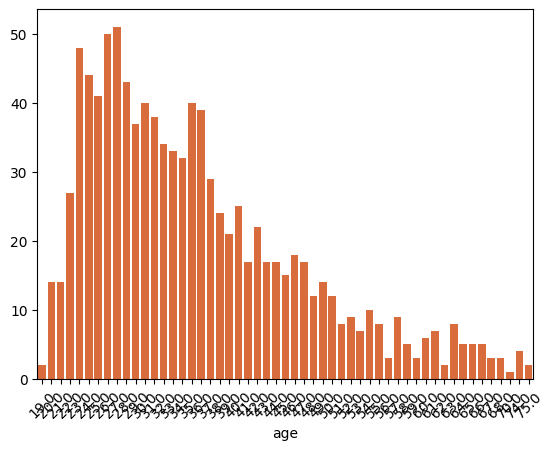

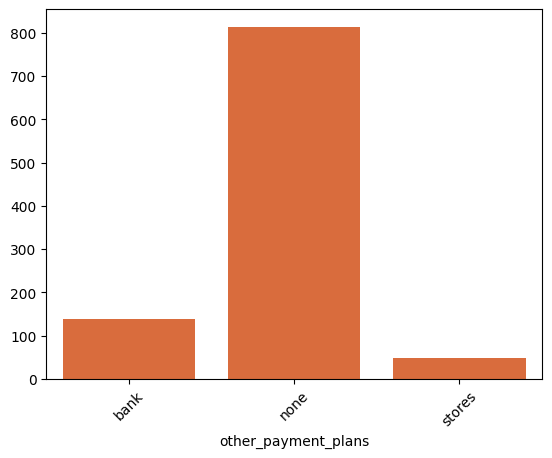

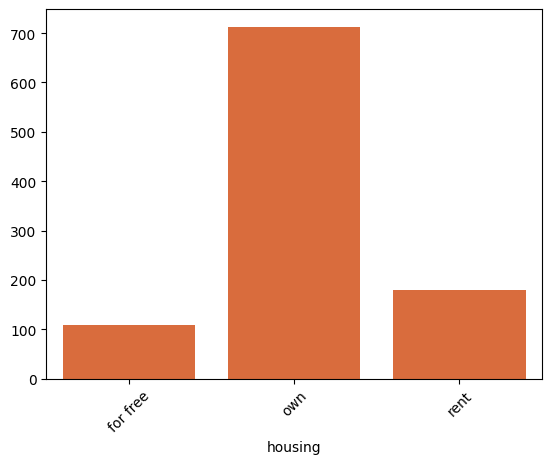

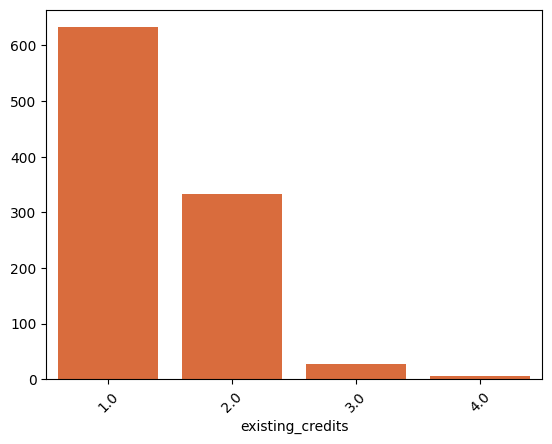

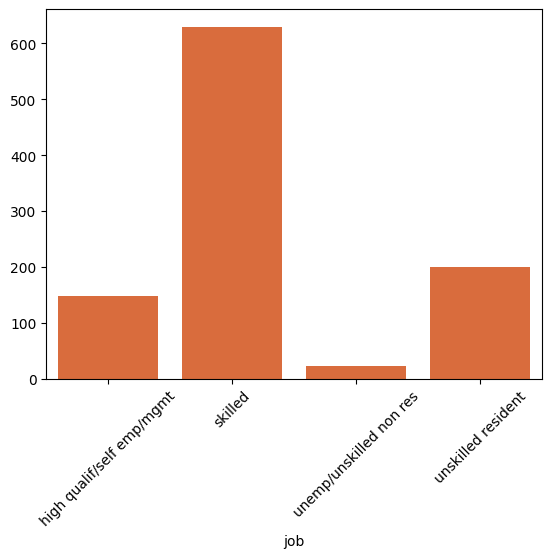

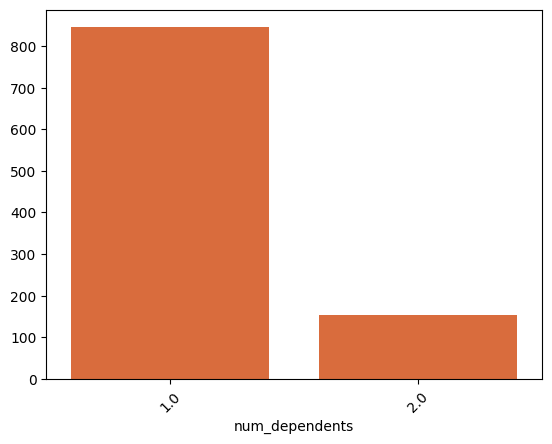

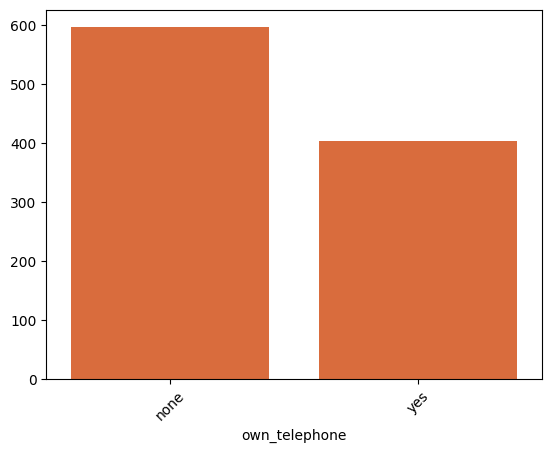

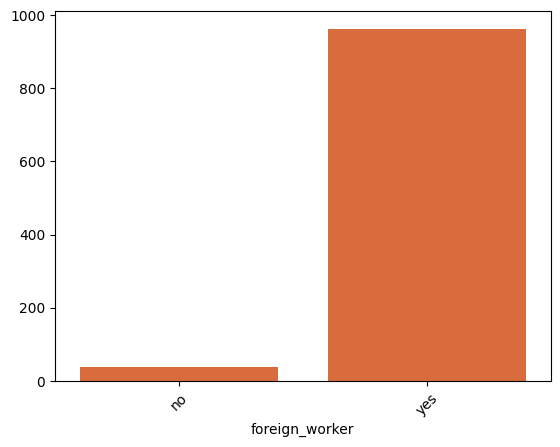

In [112]:
for el in X.columns:
    counts = X[el].value_counts()
    sns.barplot(x=counts.index, y=counts.values, color = '#f36223')
    plt.xticks(rotation=45)
    plt.show()

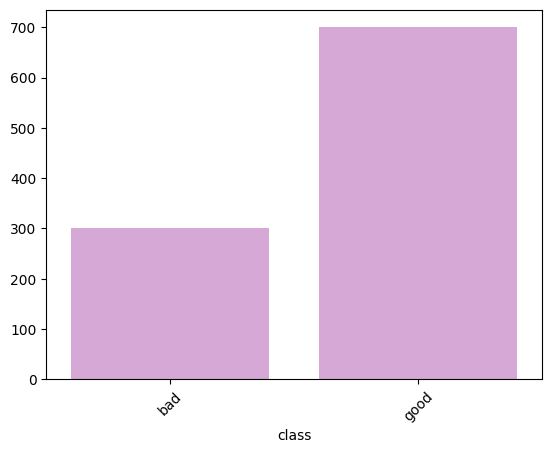

In [113]:
counts = y.value_counts()
sns.barplot(x=counts.index, y=counts.values, color='#dda0dd')
plt.xticks(rotation=45)
plt.show()

In [114]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(sparse_output=False)
data_new = onehotencoder.fit_transform(X.select_dtypes(['category']))
data_new = pd.DataFrame(data_new, columns=onehotencoder.get_feature_names_out(X.select_dtypes(['category']).columns))
df = X.drop(X.select_dtypes(['category']).columns, axis=1)
df = pd.concat([df, data_new], axis=1)
df

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,31.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
996,30.0,3857.0,4.0,4.0,40.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
998,45.0,1845.0,4.0,4.0,23.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


преобразуем катигориальные данные в числовые с помощью One Hot Enkoder для их дальнейшей обработки

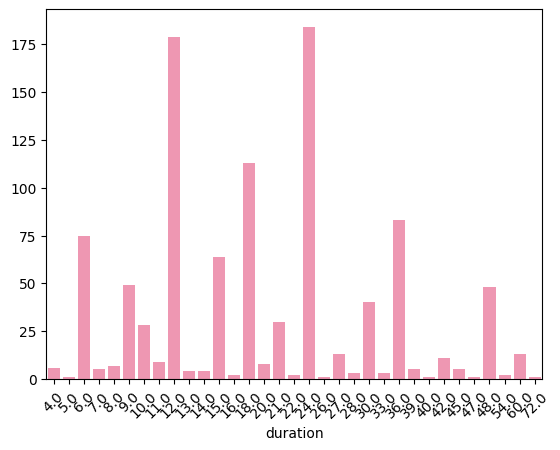

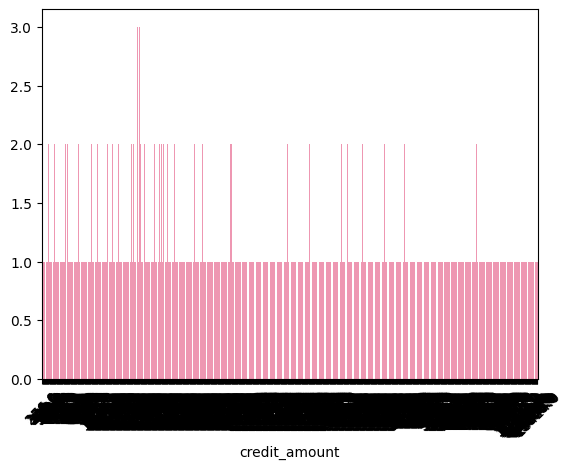

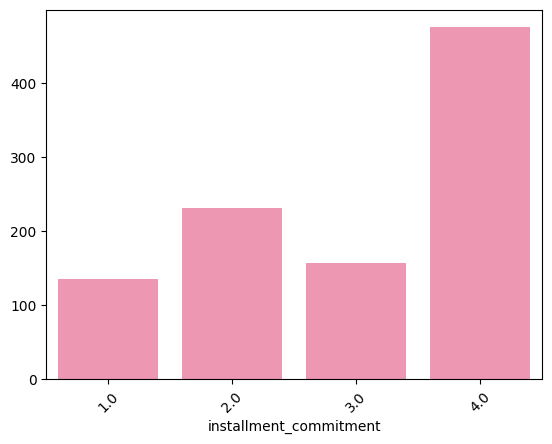

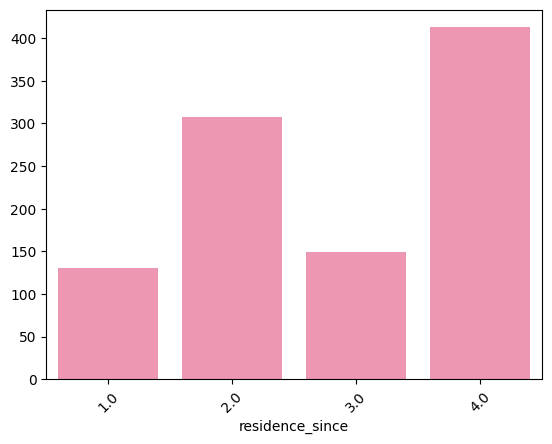

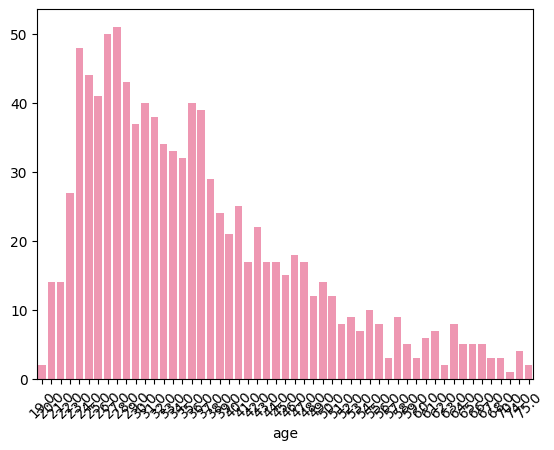

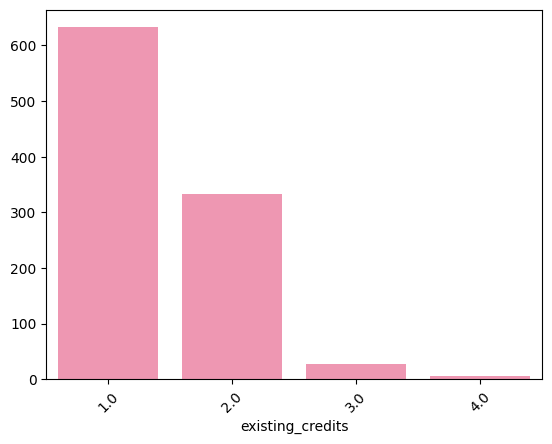

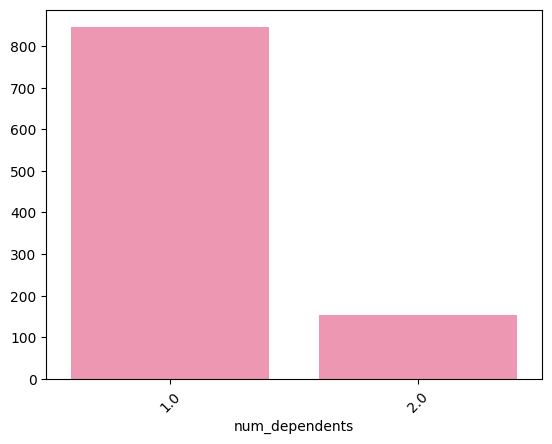

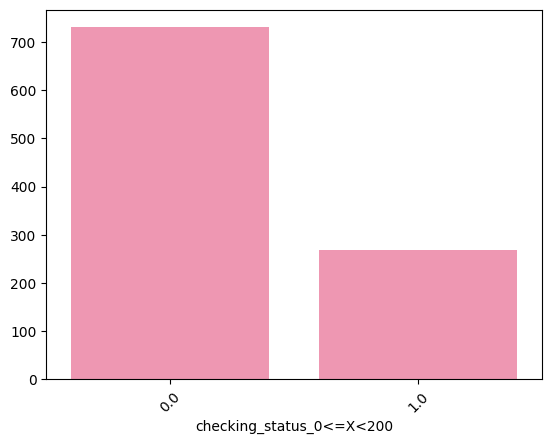

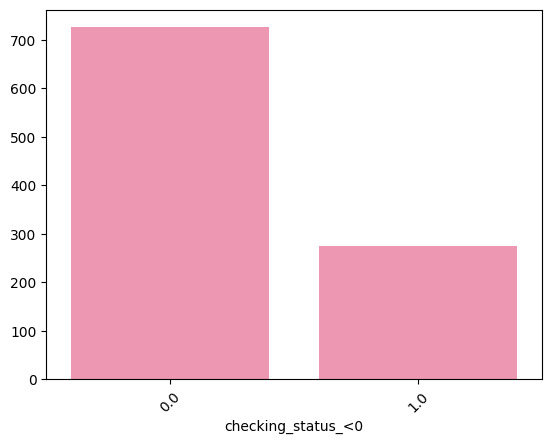

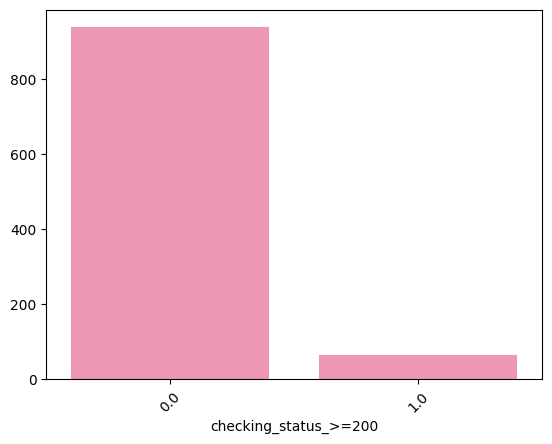

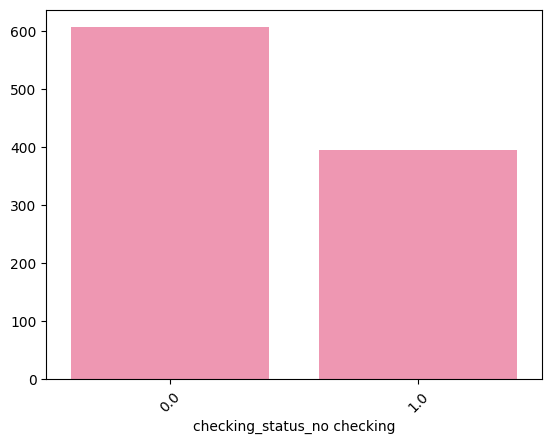

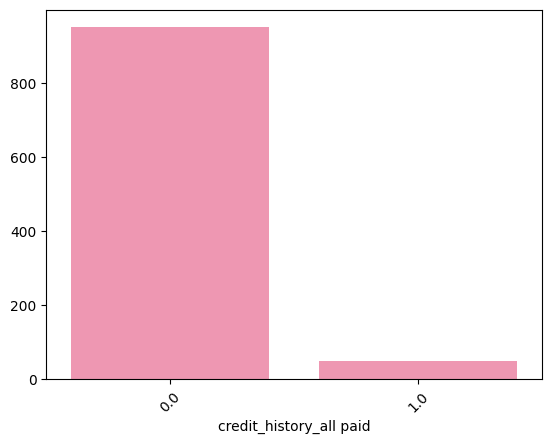

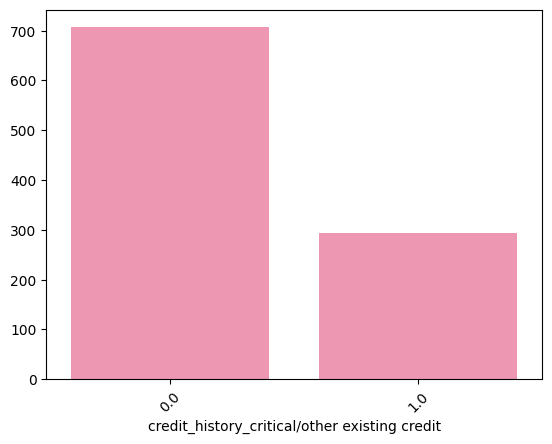

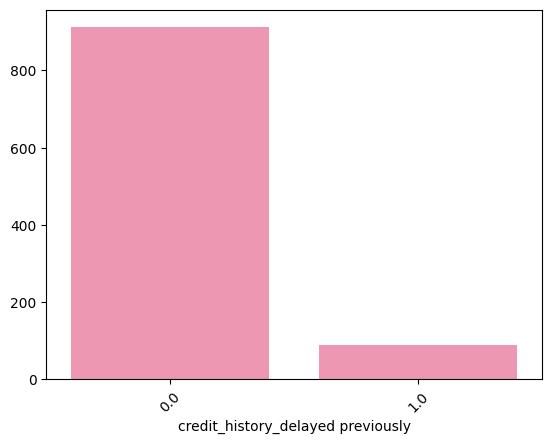

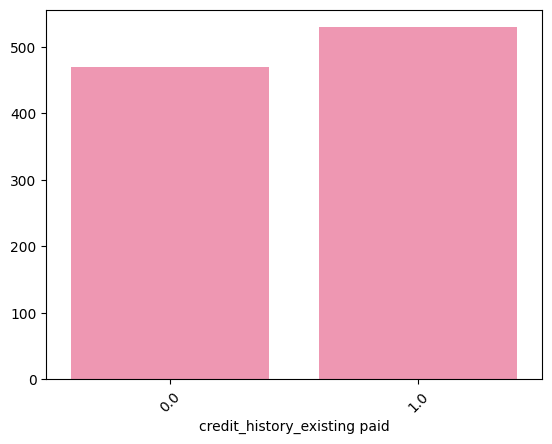

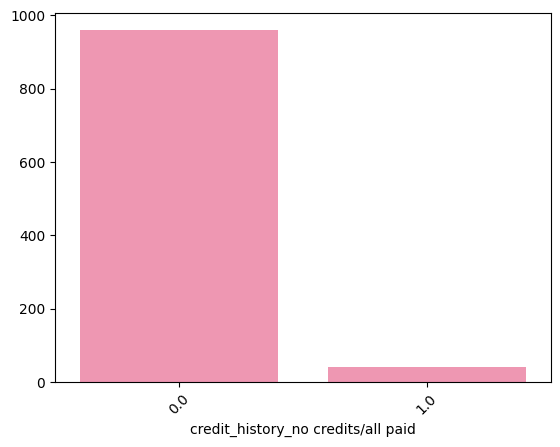

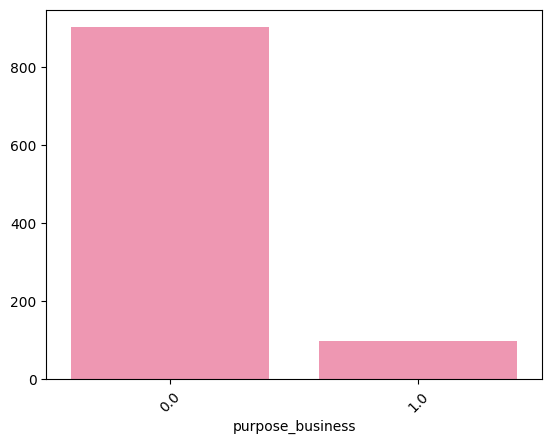

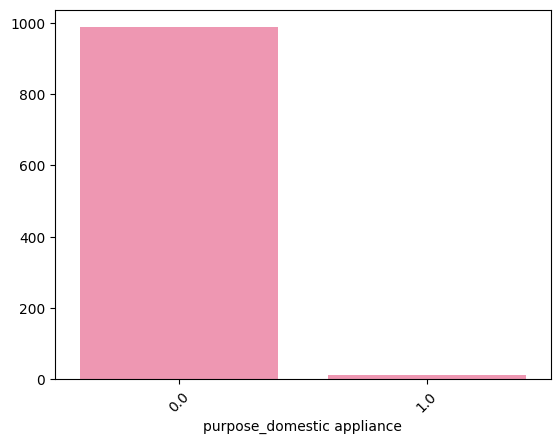

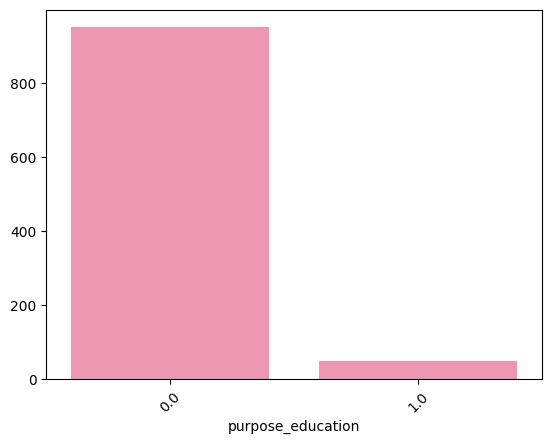

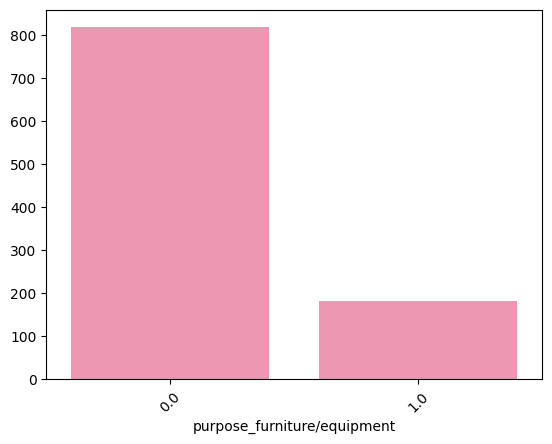

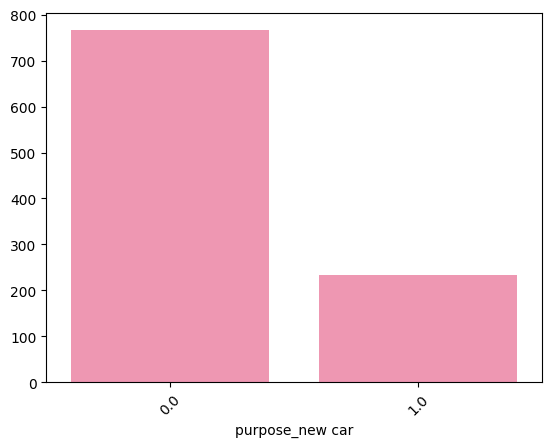

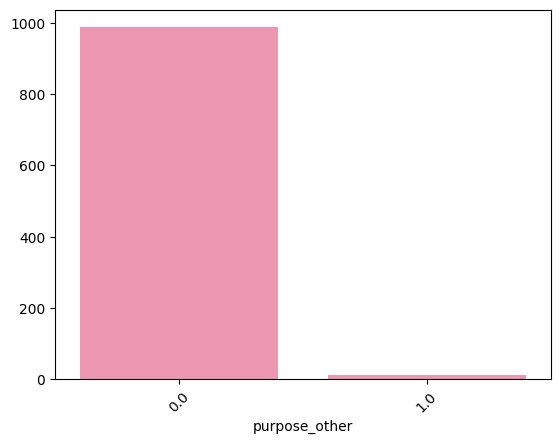

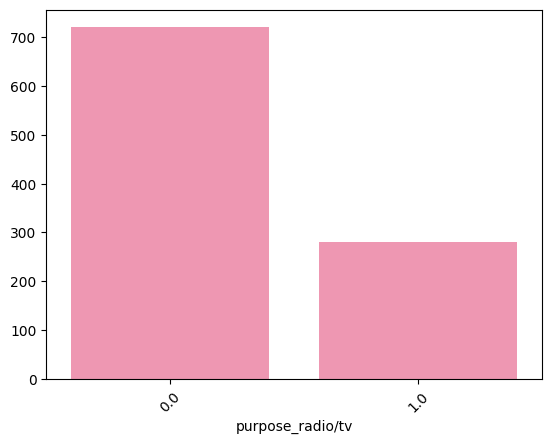

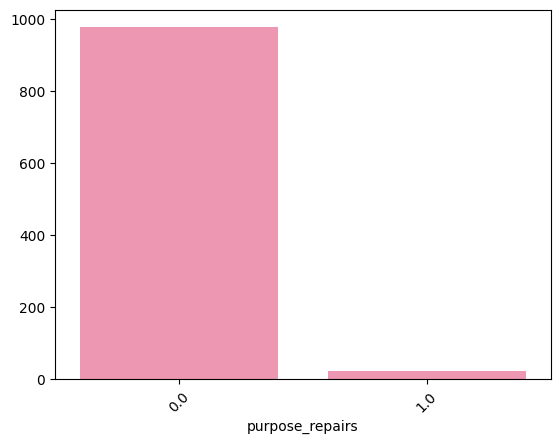

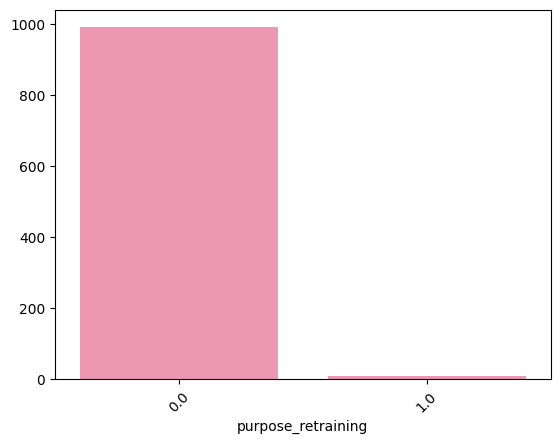

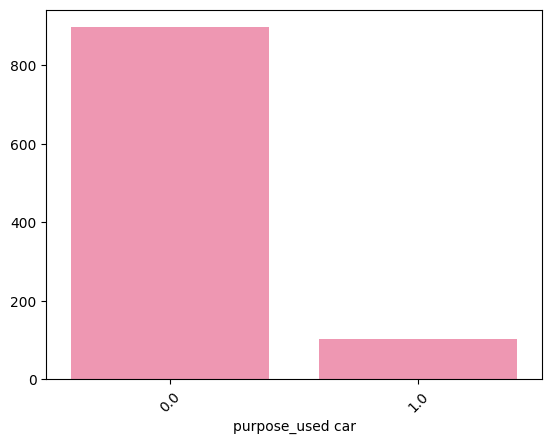

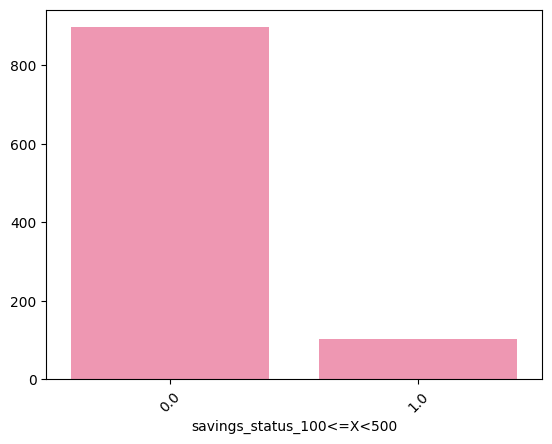

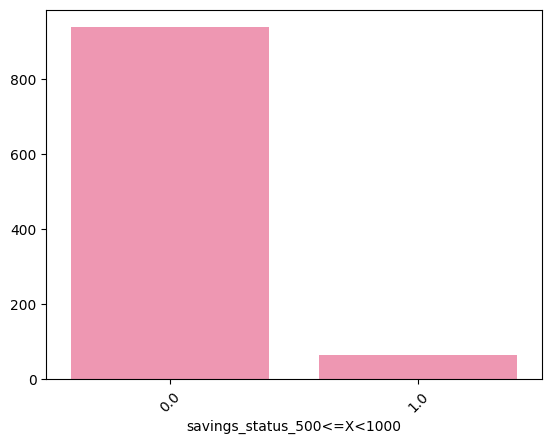

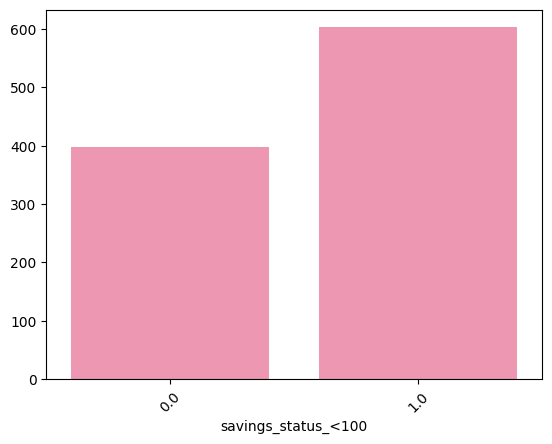

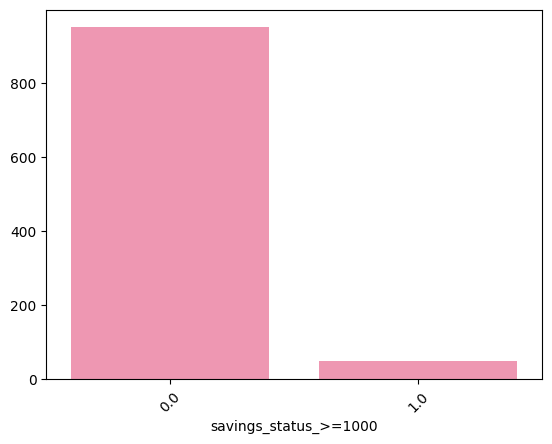

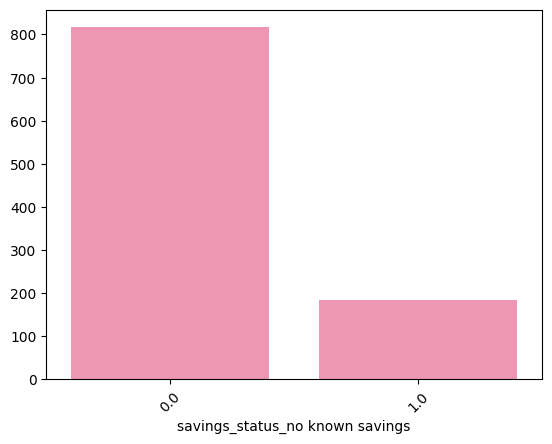

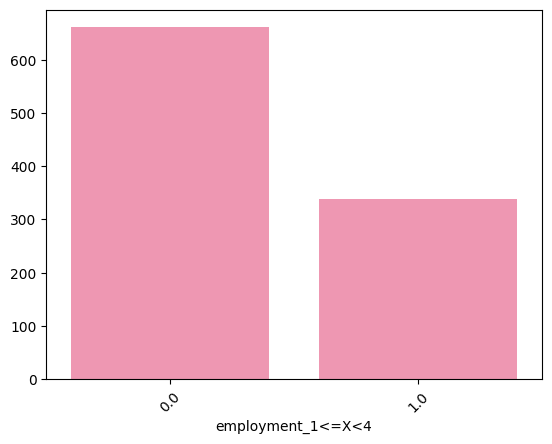

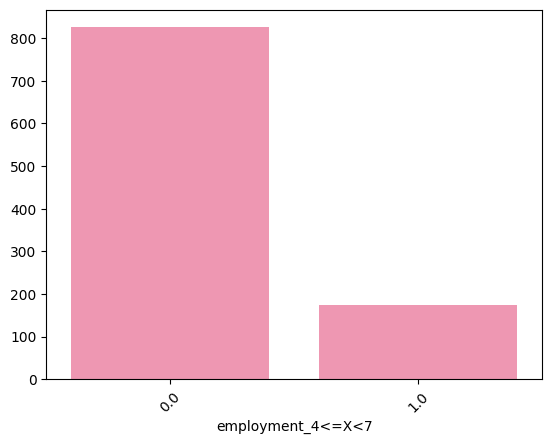

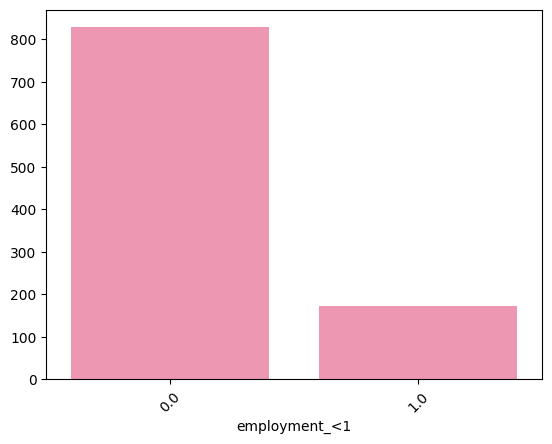

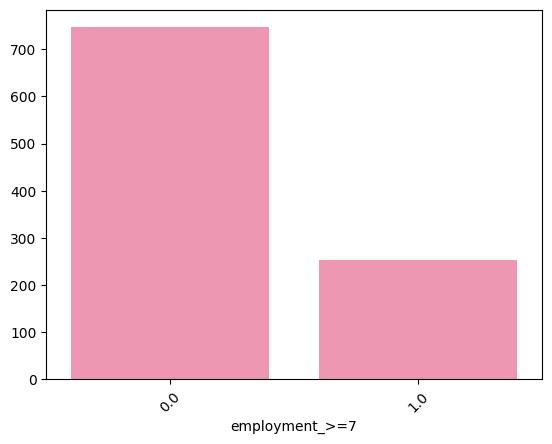

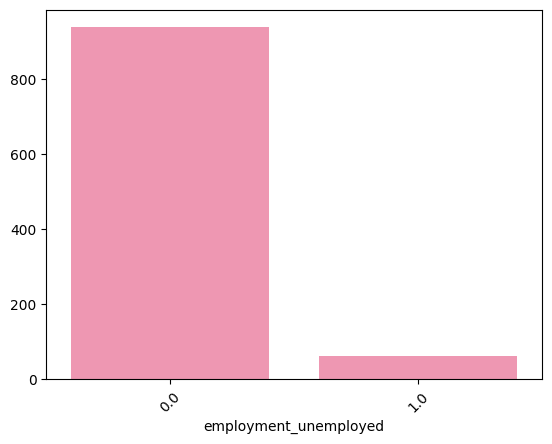

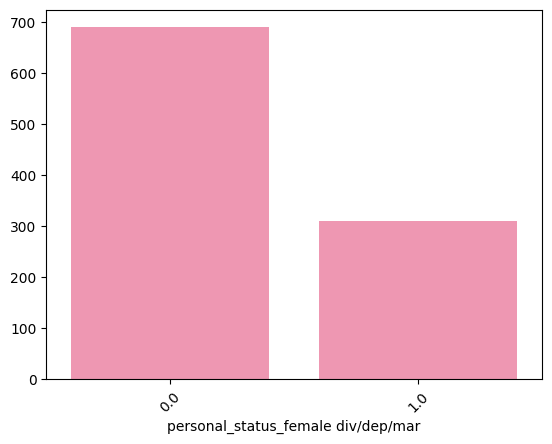

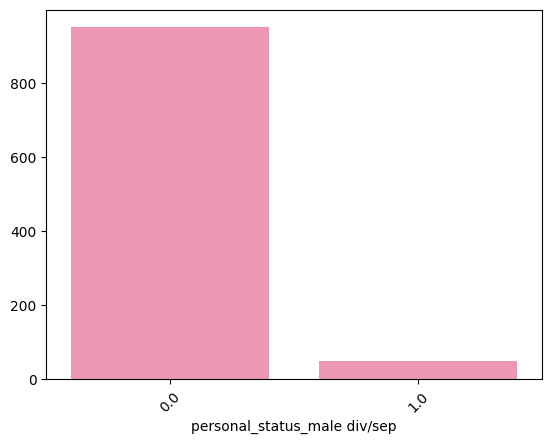

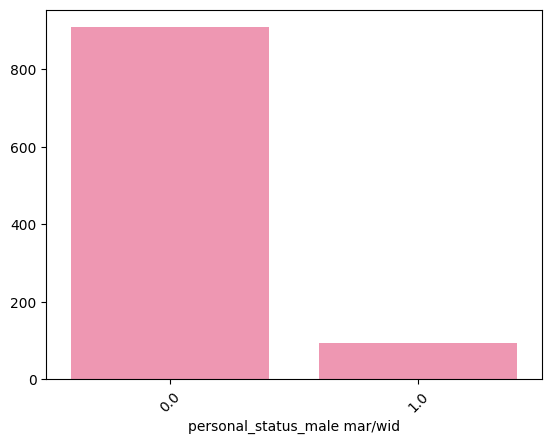

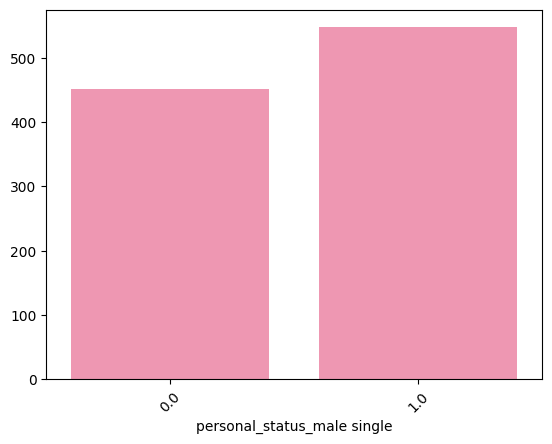

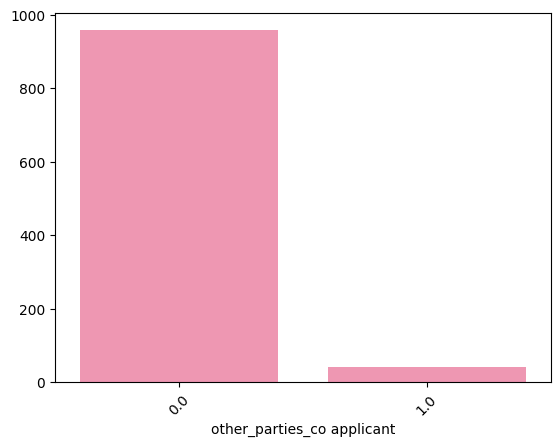

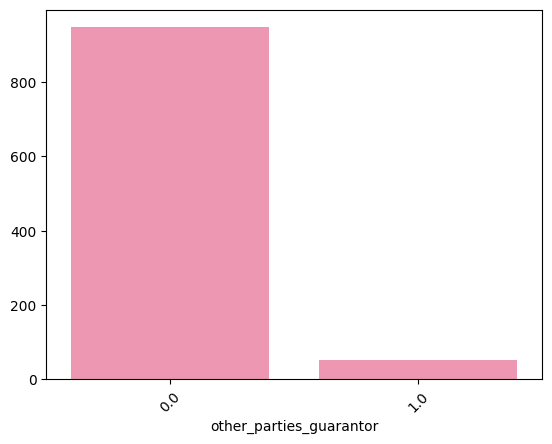

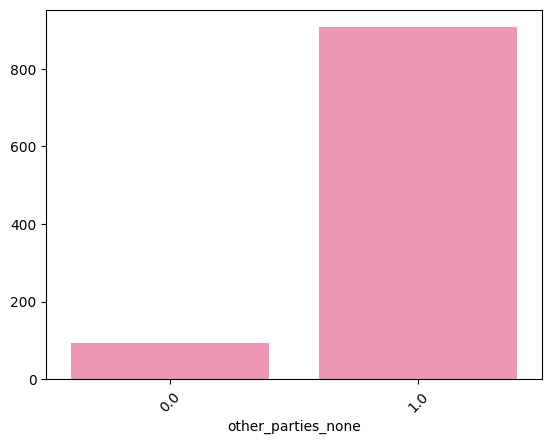

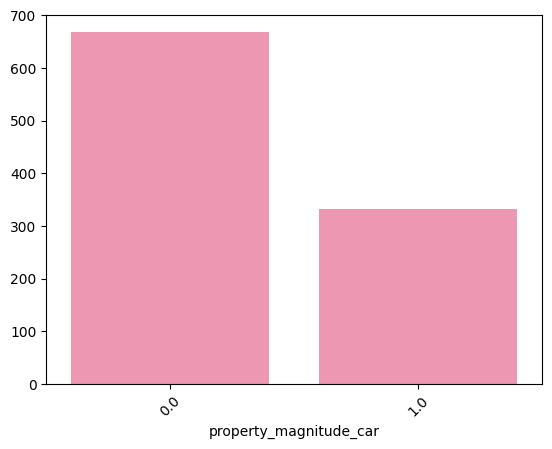

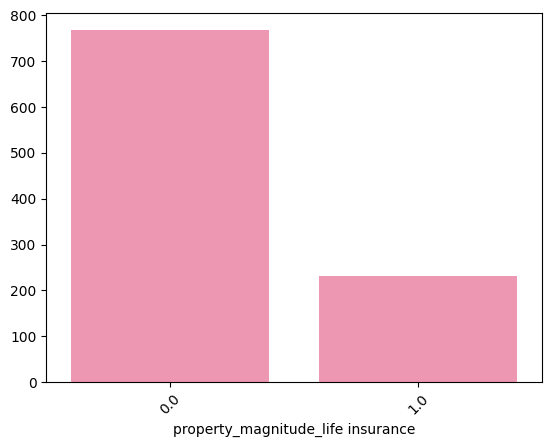

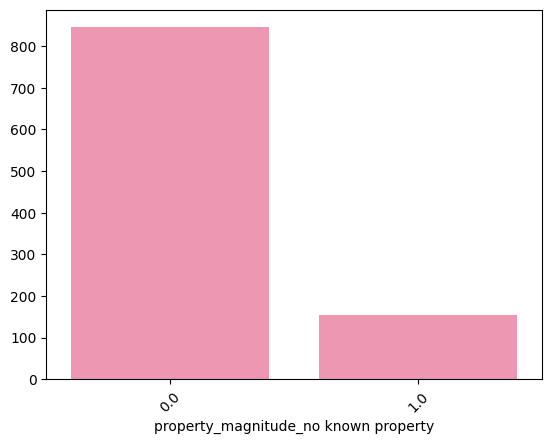

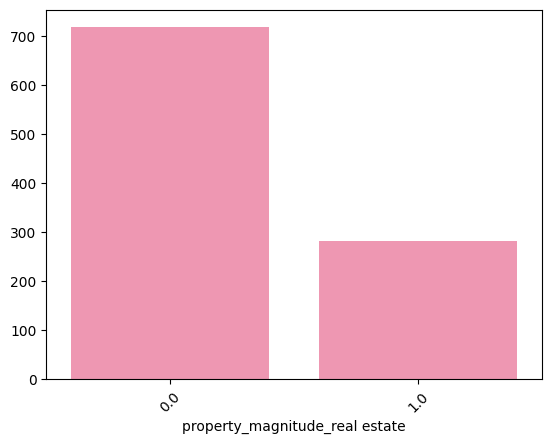

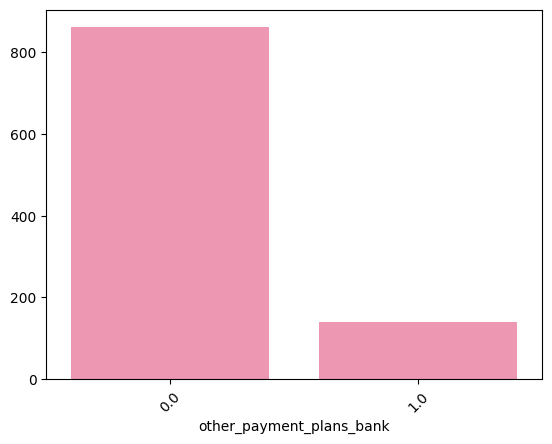

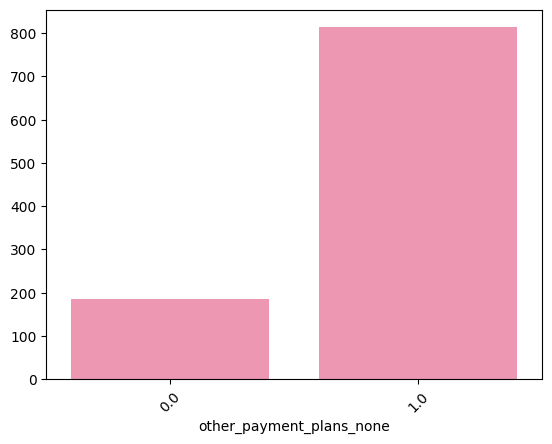

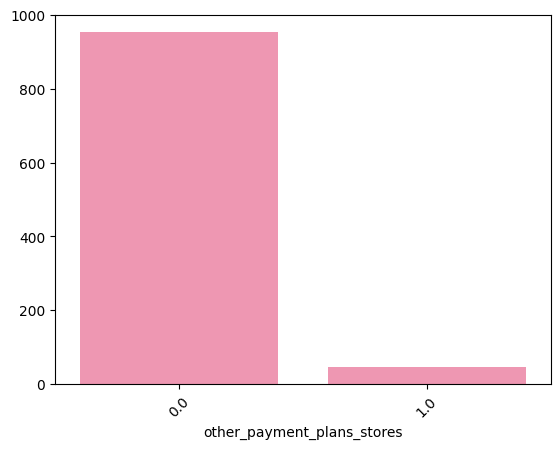

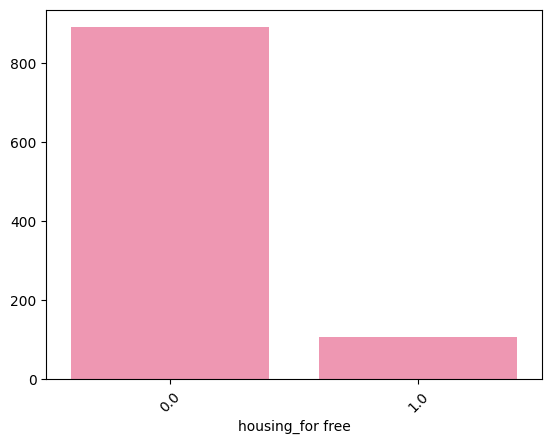

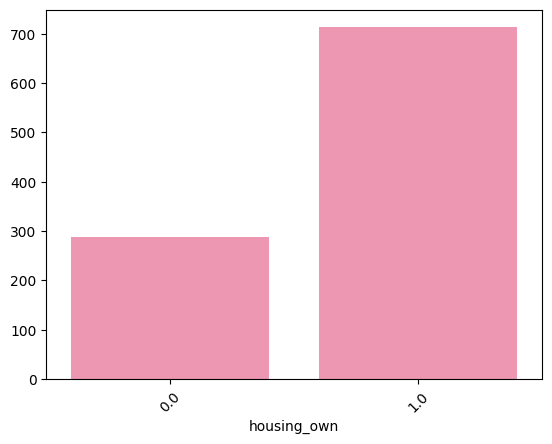

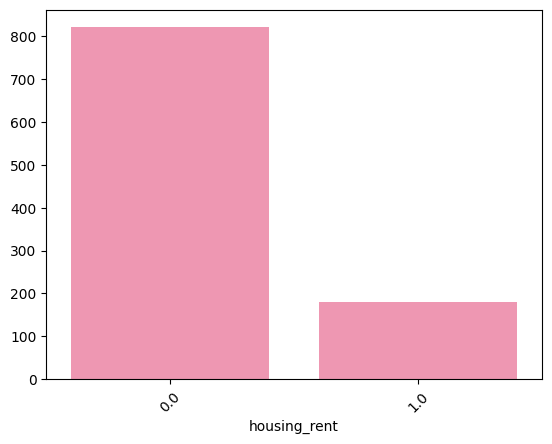

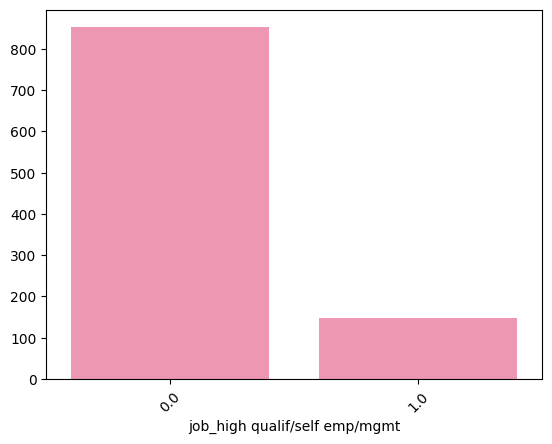

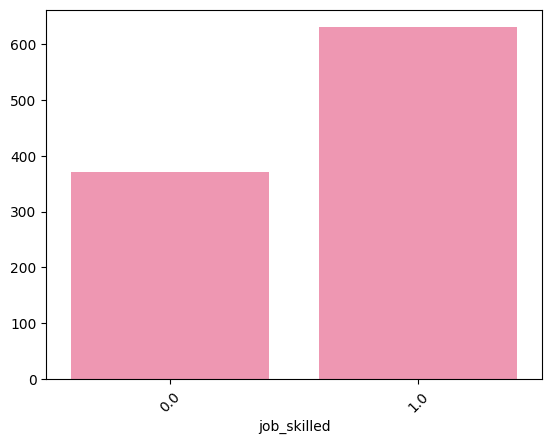

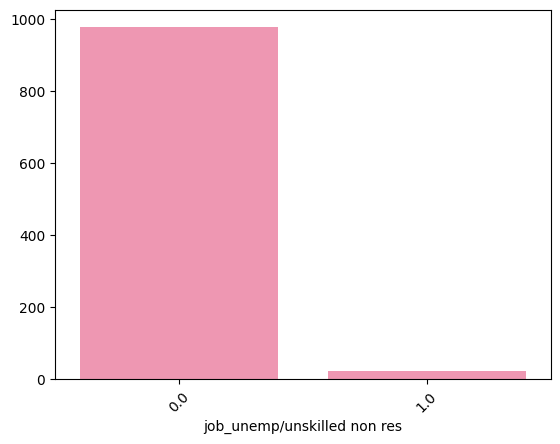

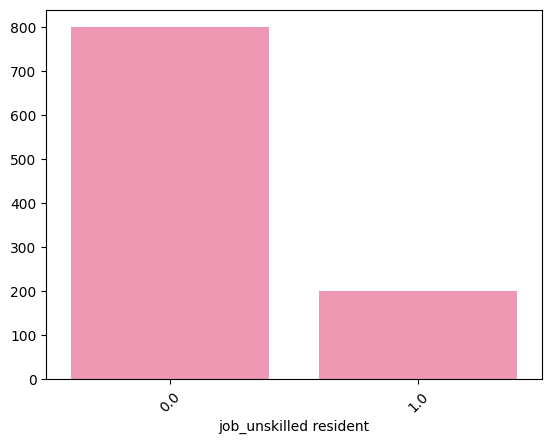

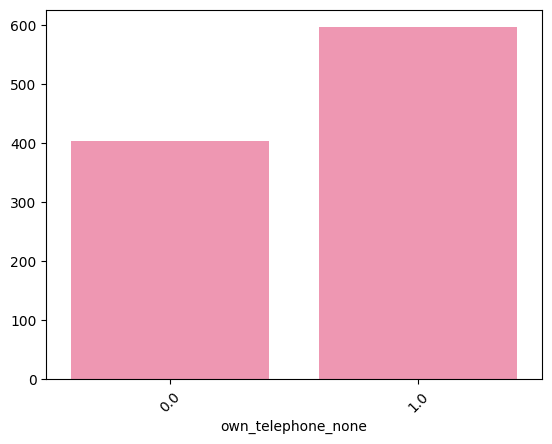

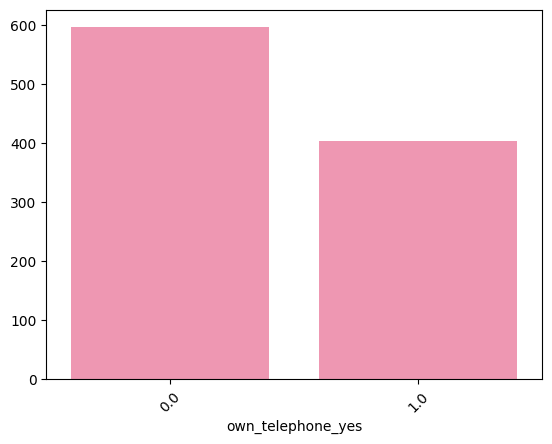

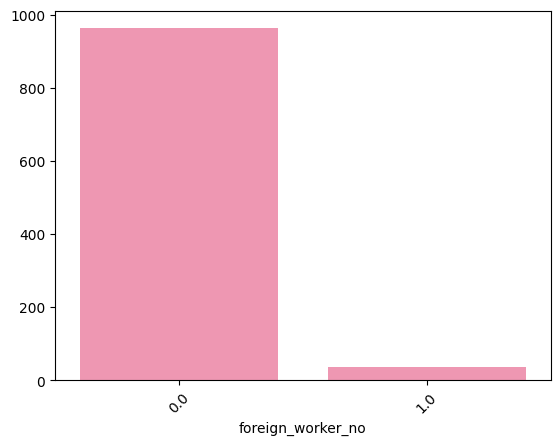

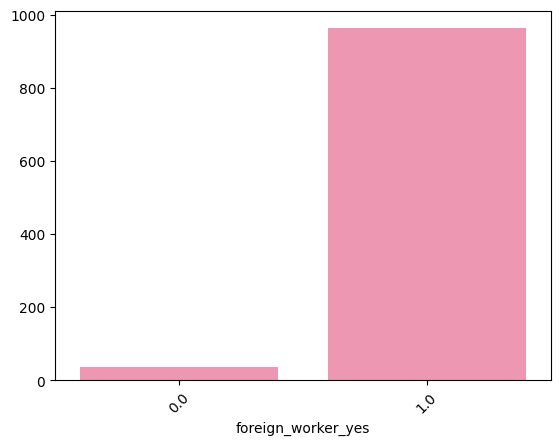

In [115]:
for el in df.columns:
    counts = df[el].value_counts()
    sns.barplot(x=counts.index, y=counts.values, color='#fc89ac')
    plt.xticks(rotation=45)
    plt.show()

In [116]:
y = y.map({"good":1,"bad":0});

Посмотрим распределение некоторых данных и избавимся от выбросов с помощью процентилей

<Axes: xlabel='age', ylabel='Count'>

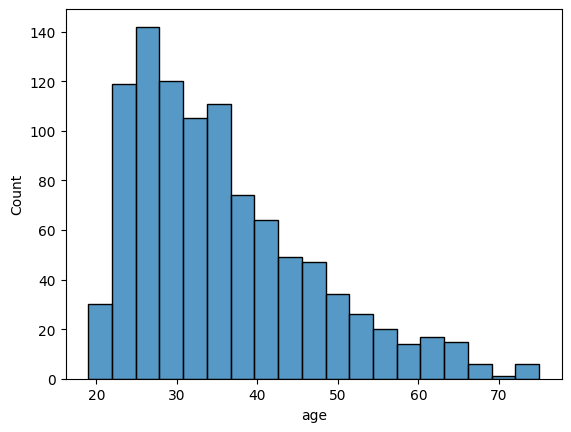

In [117]:
sns.histplot(df.age)

<Axes: xlabel='age', ylabel='Count'>

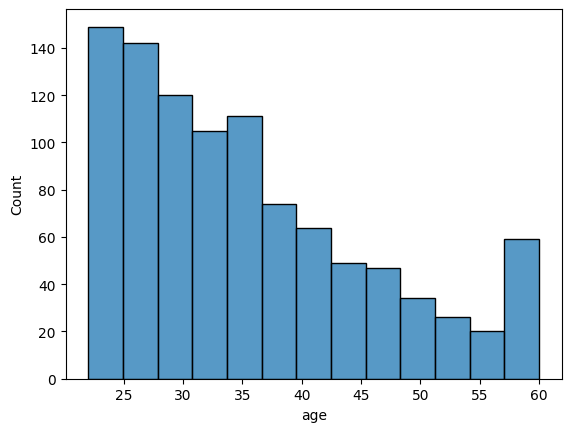

In [118]:
max = np.percentile(df.age, 95)
min = np.percentile(df.age, 5)
df.age[df.age <= min] = min
df.age[df.age >= max] = max
sns.histplot(df.age)

<Axes: xlabel='duration', ylabel='Count'>

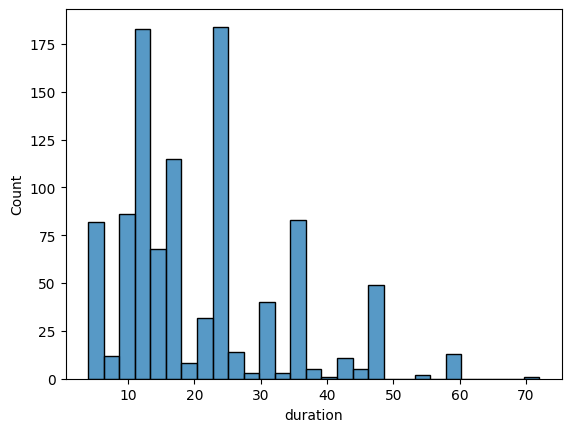

In [119]:
sns.histplot(df.duration)

<Axes: xlabel='duration', ylabel='Count'>

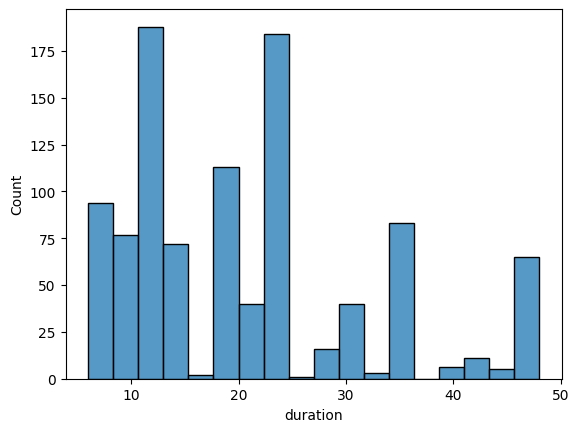

In [120]:
max = np.percentile(df.duration, 95)
min = np.percentile(df.duration, 5)
df.duration[df.duration <= min] = min
df.duration[df.duration >= max] = max
sns.histplot(df.duration)

Разделим данные на тренировочные и тестовые и обучим логистическую модель

In [121]:
x_train, y_train = df[:200], y[:200]
x_train.shape, y_train.shape
x_test, y_test = df[200:], y[200:]
x_test.shape, y_test.shape

((800, 61), (800,))

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((800, 61), (800,), (200, 61), (200,))

Обучим несколько различных моделей на наших данных и с помощью метрик F1, text, Accuracy и Precision  оценим полученную точность моделей.

In [123]:
def learning(x_train, y_train, x_test, y_test):
    models = [svm.SVC(),svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'),
            svm.SVC(kernel='poly'),  KNeighborsClassifier(n_neighbors=4),
            MLPClassifier(), tree.DecisionTreeClassifier(max_depth=3),
            GaussianNB(), PassiveAggressiveClassifier(max_iter=1000),
            RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
            RandomForestClassifier(max_depth=2, random_state=0),
            BaggingClassifier()]
    text = ["Метод опорных векторов (Без ядра)", "Метод опорных векторов (С линейным ядром)",
          "Метод опорных векторов (С гауссовым ядром)", "Метод опорных векторов (С полиномиальным ядром)",
          "Метод ближайших соседей", "Многослойный перцептрон", "Дерево решений", "Наивный байесовский классификатор",
          "Пассивно-агрессивный классификатор", "Гребневый классификатор", "Случайный лес", "Беггинг"]

    Accuracy = []
    Precision = []
    Recall = []
    F1 = []

    for i in models:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)

        Accuracy.append(accuracy_score(y_test, y_pred))
        Precision.append(precision_score(y_test, y_pred))
        Recall.append(recall_score(y_test, y_pred))
        F1.append(f1_score(y_test, y_pred))
    return pd.DataFrame({"Models" : text, "Accuracy": Accuracy, "Precision":Precision, "Recall":Recall, "F1":F1})

learning(x_train, y_train, x_test, y_test)

,Models,Accuracy,Precision,Recall,F1
0,Метод опорных векторов (Без ядра),0.705,0.717277,0.964789,0.822823
1,Метод опорных векторов (С линейным ядром),0.750,0.828571,0.816901,0.822695
2,Метод опорных векторов (С гауссовым ядром),0.705,0.717277,0.964789,0.822823
3,Метод опорных векторов (С полиномиальным ядром),0.705,0.712821,0.978873,0.824926
4,Метод ближайших соседей,0.580,0.750000,0.612676,0.674419
5,Многослойный перцептрон,0.725,0.777070,0.859155,0.816054
6,Дерево решений,0.685,0.780142,0.774648,0.777385
7,Наивный байесовский классификатор,0.695,0.858407,0.683099,0.760784
8,Пассивно-агрессивный классификатор,0.340,0.916667,0.077465,0.142857
9,Гребневый классификатор,0.765,0.810458,0.873239,0.840678


Учитывая распределение нашей целевой переменной стоит больше всего доверять метрике F1, глядя на получившиеся результаты делаем вывод, что Случайный лес оказался наиболее точен.

Выполним подбор наилучших гиперпараметров для нашей модели

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

print("Лучшие гиперпараметры:", random_search.best_params_)
print("Лучший результат перекрестной проверки:", random_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 167}
Best Cross-Validation Score: 0.77375


Создадим модель с найденными гиперпараметрами и оценим ее точность.

In [132]:
model = RandomForestClassifier(max_depth=None, min_samples_leaf=2, n_estimators=167).fit(df, y)
y_pred = model.predict(df)
print(f1_score(y, y_pred))

0.9728978457261988
